In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pickle

In [236]:
def oscillatorModelOde(t, Y, can): 

    VA = can[-1]
    
    sigma = 0.001

    ka1 = can[0]
    kb1 = can[1]
    kcat1 = can[2]

    ka2 = can[3]
    kb2 = can[4]

    ka3 = can[5]
    kb3 = can[6]

    ka4 = can[7]
    kb4 = can[8]

    ka7 = can[9]
    kb7 = can[10]
    kcat7 = can[11]

    ka5 = can[9]
    kb5 = can[10]
    kcat5 = can[11]

    ka6 = can[0]
    kb6 = can[1]
    kcat6 = can[2]

    ka8 = can[12]
    kb8 = can[13]


    ka1m = can[14]
    kb1m = can[15]

    ka2m = can[16]
    kb2m = can[17]
    
    ka3m = can[18]
    kb3m = can[19]
    
    ka4m = can[20]
    kb4m = can[21]

    ka5m = can[22]
    kb5m = can[23]

    ka6m = can[24]
    kb6m = can[25]

    ka7m = can[26]
    kb7m = can[27]

    ka8m = can[28]
    kb8m = can[29]

    ka9m = can[30]
    kb9m = can[31]

    ka10m = can[32]
    kb10m = can[33]

    ka11m = can[34]
    kb11m = can[35]

    ka12m = can[36]
    kb12m = can[37]

    ka13m = can[38]
    kb13m = can[39]

    ka14m = can[40]
    kb14m = can[41]

    #initial conditions
    L = Y[0]   # make sure in uM
    Lp = Y[1]
    K = Y[2]
    P = Y[3]
    LK = Y[4] 
    A = Y[5]
    LpA = Y[6] 
    LpAK = Y[7] 
    LpAP = Y[8] 
    LpAPLp = Y[9] 
    LpAKL = Y[10] 
    LpP = Y[11] 

    T = Y[12]
    X = Y[13]
    B = Y[14]
    C = Y[15]
    D = Y[16]
    XB = Y[17]
    XC = Y[18]
    XD = Y[19]
    XBC = Y[20]
    XXBC = Y[21]
    XBD = Y[22]
    XXBD = Y[23]
    XCD = Y[24]
    XXCD = Y[25]
    XBCD = Y[26]
    XXBCD = Y[27]
    XXXBCD = Y[28]


    dL = (kb1*LK) - (ka1*L*K) + (kcat5*LpAPLp) + (kb6*LpAKL) - ((VA/(sigma))*ka6*LpAK*L) + (kcat7*LpP)
    dLp = (kcat1*LK) + (kb2*LpA) - (ka2*Lp*A) + (kb5*LpAPLp) - ((VA/(sigma))*ka5*Lp*LpAP) + (kcat6*LpAKL) - (ka7*Lp*P) + (kb7*LpP)
    dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) + (kb3*LpAK) - (ka3*LpA*K)
    dP = (kb4*LpAP) - (ka4*LpA*P) - (ka7*Lp*P) + (kb7*LpP) + (kcat7*LpP)
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
    dA = (kb2*LpA) - (ka2*Lp*A)
    dLpA = (ka2*Lp*A) - (kb2*LpA) + (kb3*LpAK) - (ka3*LpA*K) + (kb4*LpAP) - (ka4*LpA*P) - (ka8*LpA*T) + (kb8*X)
    dLpAK = (ka3*LpA*K) - (kb3*LpAK) + (kb6*LpAKL) - ((VA/(sigma))*ka6*LpAK*L) + (kcat6*LpAKL)
    dLpAP = (ka4*LpA*P) - (kb4*LpAP) + (kb5*LpAPLp) - ((VA/(sigma))*ka5*LpAP*Lp) + (kcat5*LpAPLp)
    dLpAPLp = ((VA/(sigma))*ka5*LpAP*Lp) - (kb5*LpAPLp) - (kcat5*LpAPLp)
    dLpAKL = ((VA/(sigma))*ka6*LpAK*L) - (kb6*LpAKL) - (kcat6*LpAKL)
    dLpP = (ka7*Lp*P) - (kb7*LpP) - (kcat7*LpP)

    dT = (kb8*X) - (ka8*LpA*T)


    dX = (ka8*LpA*T) - (kb8*X) - (ka1m*X*B) + (kb1m*XB) - (ka2m*X*C) + (kb2m*XC) - (ka3m*X*D) + (kb3m*XD) - ((VA/sigma)*ka10m*XBC*X) + (kb10m*XXBC) - ((VA/sigma)*ka11m*XBD*X) + (kb11m*XXBD) - ((VA/sigma)*ka12m*XCD*X) + (kb12m*XXCD) - ((VA/sigma)*ka13m*XBCD*X) + (kb13m*XXBCD) - ((VA/sigma)*ka14m*XXBCD*X) + (kb14m*XXXBCD)

    dB = (kb1m*XB) - (ka1m*X*B) + (kb4m*XBC) - (ka4m*XC*B) + (kb5m*XBD) - (ka5m*XD*B) + (kb9m*XBCD) - (ka9m*XCD*B) + (kb9m*XXBCD) - (ka9m*XXCD*B) 
    dC = (kb2m*XC) - (ka2m*X*C) + (kb4m*XBC) - (ka4m*XB*C) + (kb8m*XBCD) - (ka8m*XBD*C) + (kb8m*XXBCD) - (ka8m*XXBD*C) + (kb6m*XCD) - (ka6m*XD*C) 
    dD = (kb3m*XD) - (ka3m*X*D) + (kb7m*XBCD) - (ka7m*XBC*D) + (kb7m*XXBCD) - (ka7m*XXBC*D) + (kb5m*XBD) - (ka5m*XB*D) + (kb6m*XCD) - (ka6m*XC*D)

    dXB = (ka1m*X*B) - (kb1m*XB) - (ka4m*XB*C) + (kb4m*XBC) - ((VA/sigma)*ka4m*XB*XC) + (kb4m*XXBC) - (ka5m*XB*D) + (kb5m*XBD) - ((VA/sigma)*ka5m*XB*XD) + (kb5m*XXBD)
    dXC = (ka2m*X*C) - (kb2m*XC) - (ka4m*XC*B) + (kb4m*XBC) - (ka6m*XC*D) + (kb6m*XCD) - ((VA/sigma)*ka6m*XC*XD) + (kb6m*XXCD) - ((VA/sigma)*ka4m*XB*XC) + (kb4m*XXBC)
    dXD = (ka3m*X*D) - (kb2m*XD) - ((VA/sigma)*ka7m*XXBC*XD) + (kb7m*XXXBCD) - (ka5m*XD*B) + (kb5m*XXBD) - ((VA/sigma)*ka5m*XB*XD) + (kb5m*XXBD) - ((VA/sigma)*ka6m*XC*XD) + (kb6m*XXCD) - (ka6m*XD*C) + (kb6m*XCD)

    dXBC = (ka4m*XB*C) - (kb4m*XBC) + (ka4m*XC*B) - (kb4m*XBC) - (ka7m*XBC*D) + (kb7m*XBCD) - ((VA/sigma)*ka10m*XBC*X) + (kb10m*XXBC)
    dXXBC = ((VA/sigma)*ka4m*XB*XC) - (kb4m*XXBC) - (ka7m*XXBC*D) + (kb7m*XXBCD) - ((VA/sigma)*ka7m*XXBC*XD) + (kb7m*XXXBCD) - (kb10m*XXBC) + ((VA/sigma)*ka10m*XBC*X) 

    dXBD = (ka5m*XB*D) - (kb5m*XBD) + (ka5m*XD*B) - (kb5m*XBD) - (ka8m*XBD*C) + (kb8m*XBCD) - ((VA/sigma)*ka11m*XBD*X) - (kb11m*XXBD) 
    dXXBD = ((VA/sigma)*ka5m*XB*XD) - (kb5m*XXBD) - (ka8m*XXBD*C) + (kb8m*XXBCD) - ((VA/sigma)*ka8m*XXBD*XC) + (kb8m*XXXBCD) - (kb11m*XXBD) + ((VA/sigma)*ka11m*XBD*X)
    
    dXCD = (ka6m*XC*D) - (kb6m*XCD) + (ka6m*XD*C) - (kb6m*XCD) - (ka9m*XCD*B) + (kb9m*XBCD) - ((VA/sigma)*ka12m*XCD*X) + (kb12m*XXCD) 
    dXXCD = ((VA/sigma)*ka6m*XC*XD) - (kb6m*XXCD) - (ka9m*XXCD*B) + (kb9m*XXBCD) - ((VA/sigma)*ka9m*XXCD*XB) + (kb9m*XXXBCD) - (kb12m*XXCD) + ((VA/sigma)*ka12m*XCD*X)

    dXBCD = (ka7m*XBC*D) - (kb7m*XBCD) + (ka8m*XBD*C) - (kb8m*XBCD) + (ka9m*XCD*B) - (kb9m*XBCD) - ((VA/sigma)*ka13m*XBCD*X) + (kb13m*XXBCD)
    dXXBCD = (ka7m*XXBC*D) - (kb7m*XXBCD) + (ka8m*XXBD*C) - (kb8m*XXBCD) + (ka9m*XXCD*B) - (kb9m*XXBCD) + ((VA/sigma)*ka13m*XBCD*X) - (kb13m*XXBCD) - (ka14m*XXBCD*X) + (kb14m*XXXBCD)
    dXXXBCD = ((VA/sigma)*ka7m*XXBCD*XD) - (kb7m*XXXBCD) + ((VA/sigma)*ka8m*XXBD*XC) - (kb8m*XXXBCD) + ((VA/sigma)*ka9m*XXCD*XB) - (kb9m*XXXBCD) + ((VA/sigma)*ka14m*XXBCD*X) - (kb14m*XXXBCD)


    return([dL, dLp, dK, dP, dLK, dA, dLpA, dLpAK, dLpAP, dLpAPLp, dLpAKL, dLpP, dT, dX, dB, dC, dD, dXB, dXC, dXD, dXBC, dXXBC, dXBD, dXXBD, dXCD, dXXCD, dXBCD, dXXBCD, dXXXBCD])	

In [256]:
s = 20 #range in seconds that you want to run simulation over
t = np.linspace(0, s, num=10000)

varnames = ["L","Lp","K","P","LK","A","LpA","LpAK","LpAP","LpAPLp","LpAKL","LpP","T","X","B","C","D","XB","XC","XD","XBC","XXBC","XBD","XXBD","XCD","XXCD","XBCD","XXBCD","XXXBCD"]
initial_populations = np.append(np.array([0,3,0.2,0.3,0,3,0,0,0,0,0,0,2,1]),(np.zeros((29-14))))

initdict = {k:v for k,v in zip(varnames,initial_populations)}
initdict['B'] = 1
initdict['C'] = 1
initdict['D'] = 1 
initdict['L'] = 10

In [257]:
viablePoints = pickle.load(open('/home/local/WIN/jfisch27/Desktop/Oscillator/Python/2022_simple_system/2d_troubleshooting/PEPE/8-24-22/Auto_Region0000ViableSet_Iter10.p','rb'))
fixedparams = viablePoints[1]

fixedparams = np.insert(fixedparams,-1, [0.2,100])
fixedparams = np.insert(fixedparams, -1, np.random.uniform(0.,100.,28))
fixedparams

parnames = ['ka1', 'kb1', 'kcat1', 'ka2', 'kb2', 'ka3', 'kb3', 'ka4', 'kb4', 'ka7', 'kb7', 'kcat7', 'ka8', 'kb8', 'ka1m', 'kb1m', 'ka2m', 'kb2m', 'ka3m', 'kb3m', 'ka4m', 'kb4m', 'ka5m', 'kb5m', 'ka6m',
             'kb6m', 'ka7m', 'kb7m', 'ka8m', 'kb8m', 'ka9m', 'kb9m', 'ka10m', 'kb10m', 'ka11m', 'kb11m', 'ka12m', 'kb12m', 'ka13m', 'kb13m', 'ka14m', 'kb14m', 'VA']
pardict = {k:v for k,v in zip(parnames,fixedparams)}

for k in list(pardict.keys())[14:]:
    if 'ka' in k:
        pardict[k] = np.random.uniform(0.,0.01)

pardict

{'ka1': 0.3240340166714304,
 'kb1': 20.795953506145654,
 'kcat1': 45.52042965131187,
 'ka2': 0.5603915744791075,
 'kb2': 3.3172192866882657,
 'ka3': 83.94876581174081,
 'kb3': 175.96956578893014,
 'ka4': 0.34842896631763337,
 'kb4': 0.39307008205227123,
 'ka7': 0.40519789601959216,
 'kb7': 11.59142670148831,
 'kcat7': 27.056056195889592,
 'ka8': 0.2,
 'kb8': 100.0,
 'ka1m': 0.00122601748906234,
 'kb1m': 45.140515168616645,
 'ka2m': 0.006114184228622612,
 'kb2m': 75.22300809985222,
 'ka3m': 0.0026103167568115593,
 'kb3m': 52.47137592654209,
 'ka4m': 0.002589163004658822,
 'kb4m': 32.31798531962355,
 'ka5m': 0.0022606438544385166,
 'kb5m': 56.08204422145464,
 'ka6m': 0.0053409222782165675,
 'kb6m': 32.852885202370096,
 'ka7m': 0.004636113804501213,
 'kb7m': 80.69274343347871,
 'ka8m': 0.004612710714498978,
 'kb8m': 79.66548890985959,
 'ka9m': 0.00033810425016712496,
 'kb9m': 42.73612055553747,
 'ka10m': 0.00981924758293218,
 'kb10m': 42.94505627359825,
 'ka11m': 0.0040347497727857805,
 '

In [258]:
# pardict['ka1m'] = 1000.
# pardict['ka2m'] = 1000. 
# pardict['ka3m'] = 1000.
# pardict['kb8'] = 0.
# pardict['VA'] = 0.1

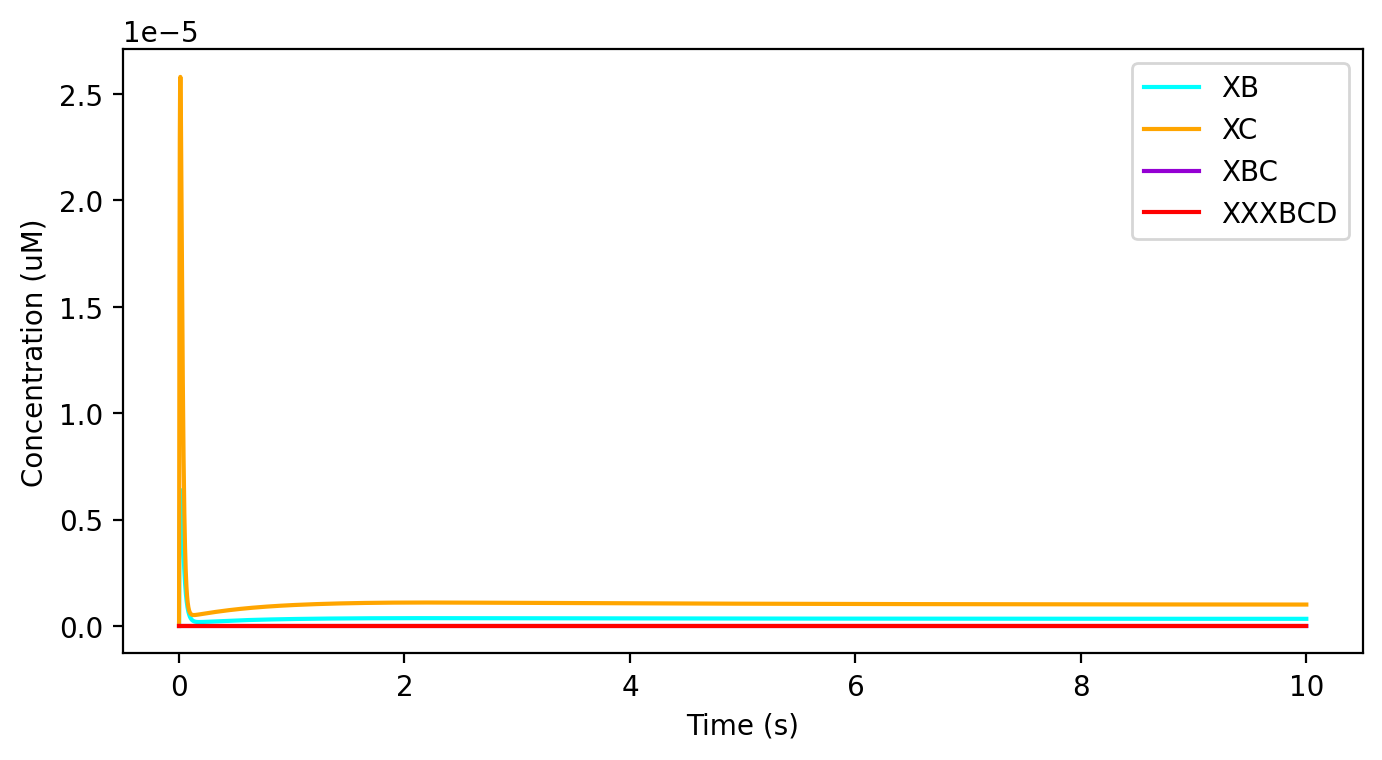

In [259]:
sol = solve_ivp(fun=oscillatorModelOde,method='BDF', t_span=(0, 10), y0=list(initdict.values()), args=(list(pardict.values()),),
            rtol=1e-6, atol=1e-9)
solutions = sol.y

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

# plt.plot(sol.t,solutions[0,:], color="b", label = 'L')
# plt.plot(t,solutions[1,:], color="orange", label = 'Lp')
# plt.plot(t,solutions[2,:], color="r", label = 'K')
# plt.plot(t,solutions[3,:], color="purple", label = 'LK')
# plt.plot(t,solutions[4,:], color="g", label = 'A')
# plt.plot(t,solutions[5,:], color="brown", label = 'LpA')
# plt.plot(t,solutions[6,:], color="pink", label = 'LpAK')
# plt.plot(t,solutions[7,:], color="black", label = 'LpAKL')
# plt.plot(t,solutions[8,:], color="grey", label = 'P')
# plt.plot(t,solutions[9,:], color="yellow", label = 'LpP')
# plt.plot(t,solutions[10,:], color="cyan", label = 'LpAP')
# plt.plot(t,solutions[13,:], color="magenta", label = 'LpAT (X)')
plt.plot(sol.t,solutions[17,:], color="cyan", label = 'XB')
plt.plot(sol.t,solutions[18,:], color="orange", label = 'XC')

plt.plot(sol.t,solutions[20,:], color="darkviolet", label = 'XBC')
plt.plot(sol.t,solutions[-1,:], color="r", label = 'XXXBCD')





plt.xlabel('Time (s)')
plt.ylabel('Concentration (uM)')
plt.legend()

In [235]:
solutions

array([[0.00000000e+00, 3.47874200e-14, 1.09793104e-13, ...,
        4.33391017e+00, 4.33391017e+00, 4.33391017e+00],
       [3.00000000e+00, 2.99999938e+00, 2.99999877e+00, ...,
        2.30985144e+00, 2.30985144e+00, 2.30985144e+00],
       [2.00000000e-01, 2.00000000e-01, 2.00000000e-01, ...,
        1.23844766e-01, 1.23844766e-01, 1.23844766e-01],
       ...,
       [0.00000000e+00, 5.47496442e-26, 2.36087508e-25, ...,
        1.85007394e+14, 1.87527394e+14, 1.90099234e+14],
       [0.00000000e+00, 4.55029532e-30, 2.60681501e-29, ...,
        1.69250585e+22, 1.72720414e+22, 1.76285742e+22],
       [0.00000000e+00, 9.99997188e-35, 9.27503528e-34, ...,
        2.78718433e+29, 2.86363086e+29, 2.94271639e+29]])

In [9]:
a = np.array([1,2,3,4,5])
np.insert(a,-1,[10,12])

array([ 1,  2,  3,  4, 10, 12,  5])

In [12]:
np.zeros(3)

array([0., 0., 0.])

In [66]:
solutions


array([[ 0.00000000e+00,  1.22530698e-06],
       [ 3.00000000e+00,  2.99906270e+00],
       [ 2.00000000e-01,  1.99996927e-01],
       [ 3.00000000e-01,  2.99819457e-01],
       [ 0.00000000e+00,  1.31488886e-11],
       [ 9.00000000e-01,  8.99244457e-01],
       [ 0.00000000e+00,  7.52374822e-04],
       [ 0.00000000e+00,  3.07329653e-06],
       [ 0.00000000e+00,  1.58151851e-08],
       [ 0.00000000e+00,  3.87534565e-09],
       [ 0.00000000e+00,  1.40608429e-13],
       [ 0.00000000e+00,  1.80523485e-04],
       [ 2.00000000e+00,  1.99999992e+00],
       [ 1.00000000e+01,  2.27732851e+01],
       [ 2.00000000e+00,  6.26155289e-02],
       [ 2.00000000e+00,  1.80320335e-04],
       [ 2.00000000e+00,  1.07352511e-01],
       [ 0.00000000e+00,  3.72669962e-01],
       [ 0.00000000e+00,  3.85246695e-06],
       [ 0.00000000e+00,  2.41082308e+01],
       [ 0.00000000e+00,  9.59675043e-07],
       [ 0.00000000e+00,  1.41181981e-03],
       [ 0.00000000e+00, -6.67447630e-01],
       [ 0.

In [189]:
sol.t.shape

(62,)